In [1]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load Dataset
df2019 = pd.read_stata("C:/Users\Krisnia C Siahaan\Documents\Semester 6\DAMI\Proyek\Data Sampel Final 2022-20230608T163803Z-001\Data Sampel Final 2022\Kontekstual TB/TB2019_kepesertaan.dta")
df2020 = pd.read_stata("C:/Users\Krisnia C Siahaan\Documents\Semester 6\DAMI\Proyek\Data Sampel Final 2022-20230608T163803Z-001\Data Sampel Final 2022\Kontekstual TB/TB2020_kepesertaan.dta")
df2021 = pd.read_stata("C:/Users\Krisnia C Siahaan\Documents\Semester 6\DAMI\Proyek\Data Sampel Final 2022-20230608T163803Z-001\Data Sampel Final 2022\Kontekstual TB/TB2021_kepesertaan.dta")

In [3]:
#Tambahkan Kolom Tahun
df2019["tahun"] = 2019
df2020["tahun"] = 2020
df2021["tahun"] = 2021

In [4]:
#Gabungkan Dataset
df_all = pd.concat([df2019, df2020, df2021], ignore_index=True)

In [5]:
# Lihat Beberapa Baris
df_all.head()

,PSTV01,PSTV02,PSTV03,PSTV04,PSTV05,PSTV06,PSTV07,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV15,PSTV16,PSTV17,PSTV18,tahun
0,21611150,21611150,1957-09-12,PESERTA,PEREMPUAN,KAWIN,KELAS I,PPU,ACEH,ACEH BESAR,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH BESAR,1.157796,2019,AKTIF,NaN,2019
1,94343049,96772919,1961-12-03,SUAMI,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.556821,2019,AKTIF,NaN,2019
2,83393824,298548714,2002-10-05,ANAK,LAKI-LAKI,BELUM KAWIN,KELAS I,PPU,ACEH,ACEH TENGGARA,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TENGGARA,1.159913,2019,AKTIF,NaN,2019
3,328537885,328537885,1989-07-13,PESERTA,PEREMPUAN,BELUM KAWIN,KELAS III,PBI APBD,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,9.436164,2019,AKTIF,NaN,2019
4,67805935,67805935,1972-11-13,PESERTA,LAKI-LAKI,KAWIN,KELAS I,PPU,ACEH,ACEH TAMIANG,PEMERINTAH KABUPATEN/KOTA,PUSKESMAS,ACEH,ACEH TAMIANG,0.899331,2019,AKTIF,NaN,2019


In [6]:
# Struktur Dataset
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284898 entries, 0 to 284897
Data columns (total 19 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   PSTV01  284898 non-null  int32         
 1   PSTV02  284898 non-null  int32         
 2   PSTV03  284898 non-null  datetime64[ns]
 3   PSTV04  284898 non-null  category      
 4   PSTV05  284898 non-null  category      
 5   PSTV06  284898 non-null  category      
 6   PSTV07  284898 non-null  object        
 7   PSTV08  284898 non-null  object        
 8   PSTV09  284898 non-null  category      
 9   PSTV10  284898 non-null  category      
 10  PSTV11  284898 non-null  category      
 11  PSTV12  284898 non-null  category      
 12  PSTV13  284898 non-null  category      
 13  PSTV14  284898 non-null  category      
 14  PSTV15  284898 non-null  float32       
 15  PSTV16  284898 non-null  int16         
 16  PSTV17  284898 non-null  object        
 17  PSTV18  20277 non-null   floa

In [7]:
# Jumlah Data per Tahun
df_all["tahun"].value_counts().sort_index()

tahun
2019    94966
2020    94966
2021    94966
Name: count, dtype: int64

In [8]:
# Hitung Jumlah Peserta per Kabupaten per Tahun
peserta_per_kab = df_all.groupby(['PSTV10', 'tahun']).size().reset_index(name='jumlah_peserta')
peserta_per_kab.head()

C:\Users\Krisnia C Siahaan\AppData\Local\Temp\ipykernel_13916\3773590192.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  peserta_per_kab = df_all.groupby(['PSTV10', 'tahun']).size().reset_index(name='jumlah_peserta')


,PSTV10,tahun,jumlah_peserta
0,SIMEULUE,2019,125
1,SIMEULUE,2020,119
2,SIMEULUE,2021,117
3,ACEH SINGKIL,2019,164
4,ACEH SINGKIL,2020,162


C:\Users\Krisnia C Siahaan\AppData\Local\Temp\ipykernel_13916\1344002406.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_all, x='tahun', palette='Set2')


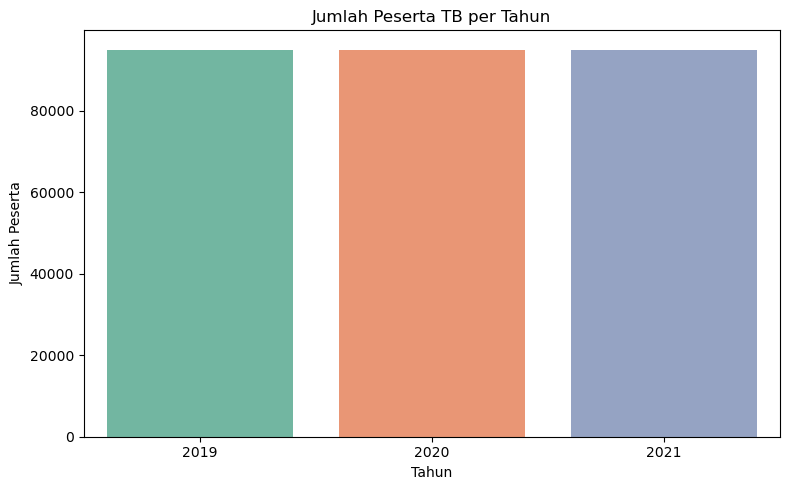

In [9]:
# Visualisasi Jumlah Peserta per Tahun
plt.figure(figsize=(8,5))
sns.countplot(data=df_all, x='tahun', palette='Set2')
plt.title('Jumlah Peserta TB per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Peserta')
plt.tight_layout()
plt.show()

C:\Users\Krisnia C Siahaan\AppData\Local\Temp\ipykernel_13916\1931808410.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_kabupaten.values, y=top_kabupaten.index, palette='viridis')


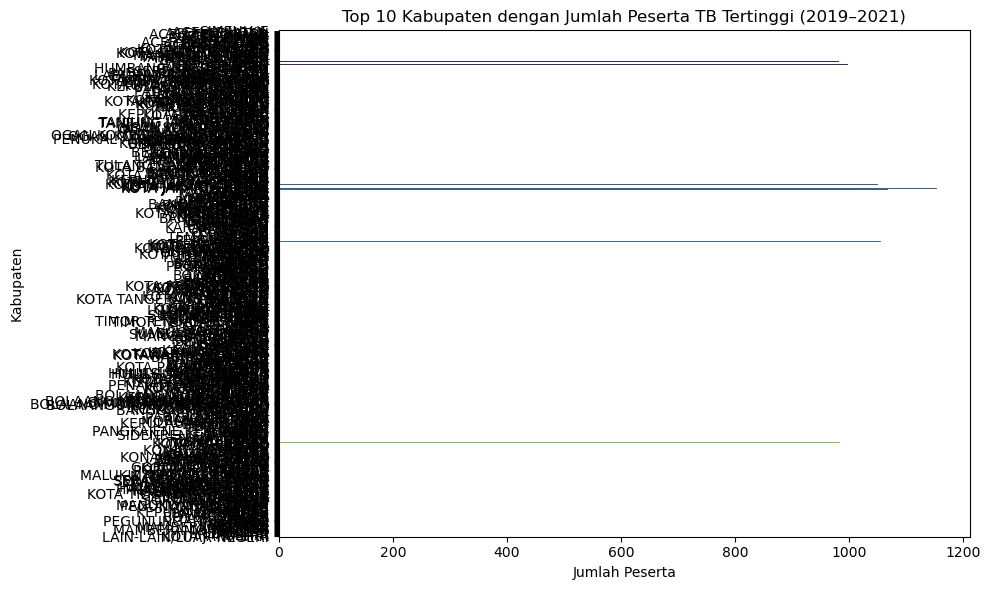

In [10]:
top_kabupaten = df_all['PSTV10'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_kabupaten.values, y=top_kabupaten.index, palette='viridis')
plt.title('Top 10 Kabupaten dengan Jumlah Peserta TB Tertinggi (2019–2021)')
plt.xlabel('Jumlah Peserta')
plt.ylabel('Kabupaten')
plt.tight_layout()
plt.show()

In [11]:
print("Distribusi Jenis Kelamin:")
print(df_all['PSTV05'].value_counts())

print("\\nDistribusi Kelas Rawat:")
print(df_all['PSTV07'].value_counts())

print("\\nDistribusi Jenis Kepesertaan:")
print(df_all['PSTV08'].value_counts())

Distribusi Jenis Kelamin:
PSTV05
LAKI-LAKI    151830
PEREMPUAN    133068
Name: count, dtype: int64
\nDistribusi Kelas Rawat:
PSTV07
KELAS III    170795
KELAS II      61492
KELAS I       52594
9                17
Name: count, dtype: int64
\nDistribusi Jenis Kepesertaan:
PSTV08
PPU              84817
PBI APBN         67917
PBPU             66610
PBI APBD         53281
BUKAN PEKERJA    12269
9                    4
Name: count, dtype: int64


**KORELASI**

In [12]:
# Ambil hanya kolom numerik dari dataset
numerik_df = df_all.select_dtypes(include=['number'])

In [13]:
# Hitung korelasi
korelasi = numerik_df.corr()

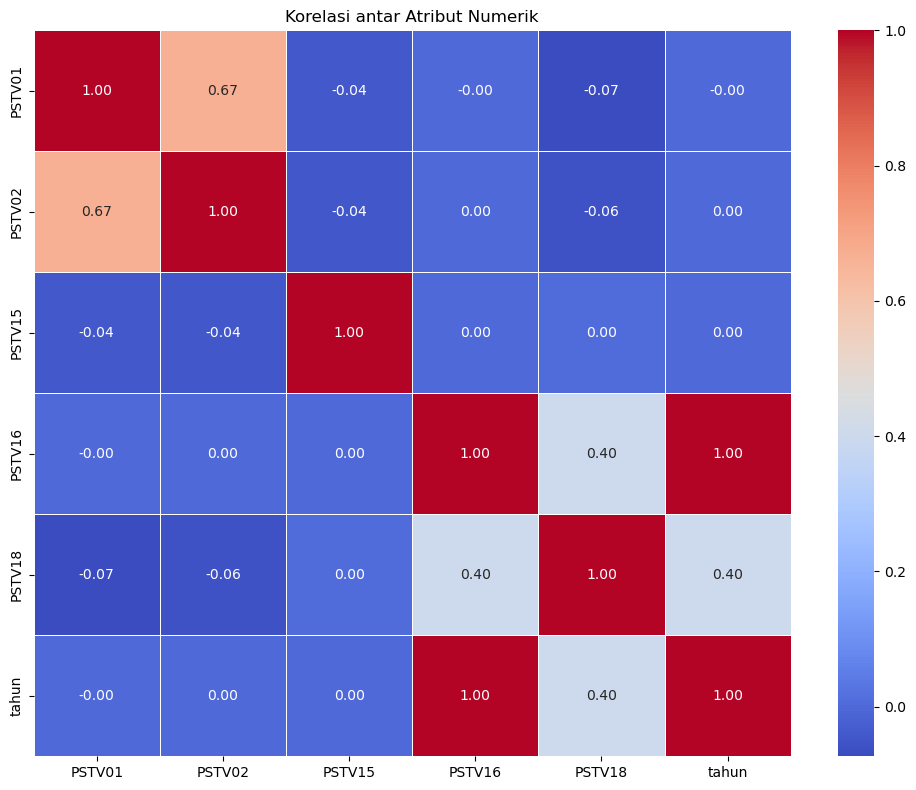

In [15]:
# Tampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Korelasi antar Atribut Numerik")
plt.tight_layout()
plt.show()

In [16]:
#cek nama kolom numerik
numerik_df.columns

Index(['PSTV01', 'PSTV02', 'PSTV15', 'PSTV16', 'PSTV18', 'tahun'], dtype='object')

In [18]:
# 2. Buat salinan untuk diproses
df = df_all.copy()

In [20]:
# Contoh encoding (bisa disesuaikan dengan isi kolommu)
if 'PSTV05' in df.columns:
    df['jenis_kelamin'] = df['PSTV05'].map({'L': 1, 'P': 0})
    
if 'PSTV07' in df.columns:
    df['kelas_rawat'] = pd.to_numeric(df['PSTV07'], errors='coerce')

if 'PSTV08' in df.columns:
    df['jenis_kepesertaan'] = df['PSTV08'].astype('category').cat.codes

if 'PSTV10' in df.columns:
    df['kabupaten_kode'] = df['PSTV10'].astype('category').cat.codes

if 'PSTV11' in df.columns:
    df['jenis_layanan'] = df['PSTV11'].astype('category').cat.codes

In [21]:
# 4. Pilih hanya kolom numerik yang sudah siap untuk korelasi
kolom_korelasi = ['kelas_rawat', 'jenis_kepesertaan', 'jenis_kelamin',
                  'kabupaten_kode', 'jenis_layanan', 'tahun']

In [24]:
# Tambahkan jika ada kolom biaya atau usia
if 'PSTV06' in df.columns:  # usia
    kolom_korelasi.append('PSTV06')
if 'PSTV12' in df.columns:  # biaya
    kolom_korelasi.append('PSTV12')

# Pilih hanya kolom numerik yang valid (otomatis)
df_corr = df.select_dtypes(include='number')

In [25]:
# Hitung korelasi
corr_matrix = df_corr.corr()

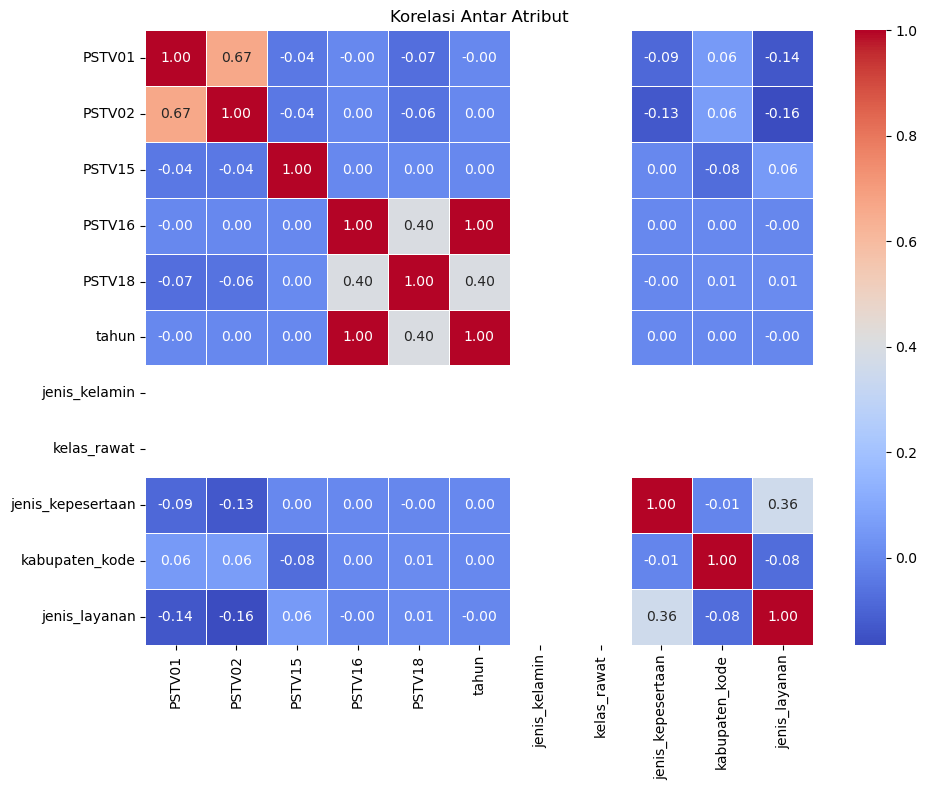

In [26]:
# 6. TAMPILKAN HEATMAP
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi Antar Atribut")
plt.tight_layout()
plt.show()

KORELASI

In [30]:
# Ambil hanya kolom pstv yang bertipe numerik
biaya_cols = [col for col in df.columns if col.startswith('pstv') and pd.api.types.is_numeric_dtype(df[col])]

In [31]:
# Hitung total biaya dari kolom-kolom numerik
df['total_biaya'] = df[biaya_cols].sum(axis=1)

In [32]:
# Cek hasil ringkasan biaya per jenis layanan
biaya_per_jenis = df.groupby('jenis_layanan')['total_biaya'].describe()
print(biaya_per_jenis)

                  count          mean           std           min  \
jenis_layanan                                                       
0                  23.0  2.946736e+08  2.388912e+08  3.281923e+07   
1                 821.0  3.056223e+08  2.733107e+08  9.877124e+05   
2              206704.0  4.050374e+08  2.958220e+08  1.793792e+04   
3                2275.0  2.497912e+08  2.432196e+08  3.899120e+04   
4                3183.0  2.421511e+08  2.364666e+08  3.718787e+05   
5                 394.0  2.799222e+08  2.655205e+08  5.867426e+04   
6                 285.0  2.773446e+08  2.657833e+08  5.714006e+06   
7                2331.0  3.077710e+08  2.750901e+08  1.421325e+06   
8               68882.0  2.924184e+08  2.676468e+08  9.397715e+03   

                        25%           50%           75%           max  
jenis_layanan                                                          
0              1.102836e+08  1.937847e+08  4.132181e+08  7.707017e+08  
1              9.566353e

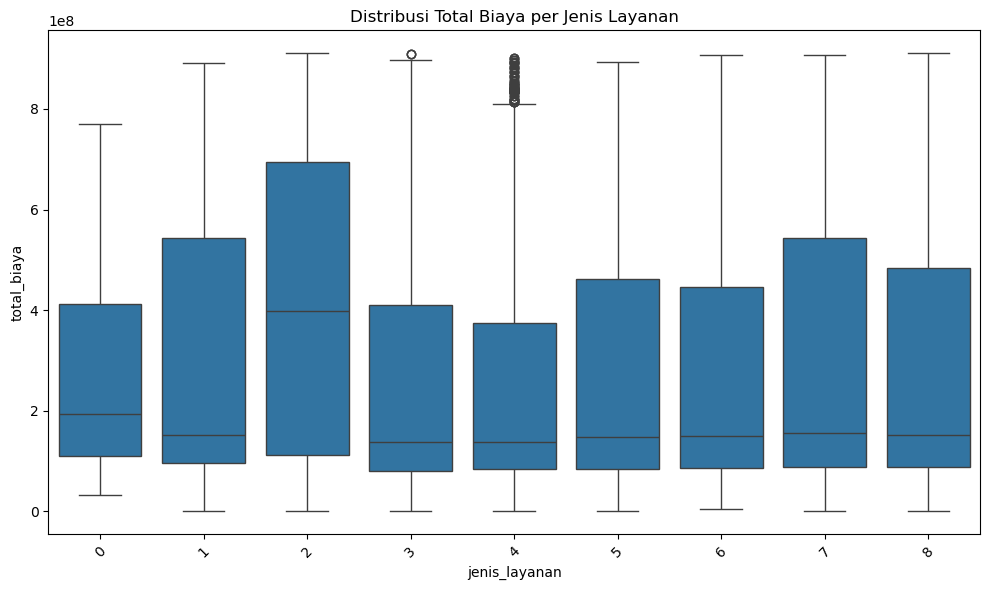

In [33]:
# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='jenis_layanan', y='total_biaya')
plt.title('Distribusi Total Biaya per Jenis Layanan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

# Encode jenis_layanan menjadi angka
le = LabelEncoder()
df['jenis_layanan_encoded'] = le.fit_transform(df['jenis_layanan'])

In [37]:
# Hitung korelasi Pearson
pearson_corr, p_value = stats.pearsonr(df['jenis_layanan_encoded'], df['total_biaya'])

print(f'Korelasi Pearson antara jenis_layanan dan total_biaya: {pearson_corr:.4f}')
print(f'Nilai p: {p_value:.4f}')

Korelasi Pearson antara jenis_layanan dan total_biaya: -0.1650
Nilai p: 0.0000


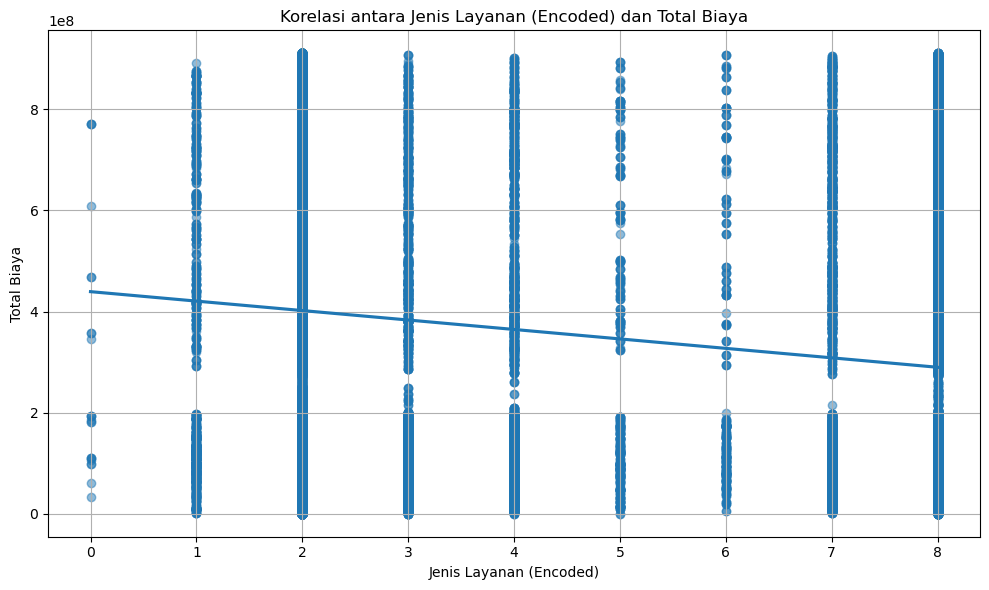

In [38]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.regplot(x='jenis_layanan_encoded', y='total_biaya', data=df, scatter_kws={'alpha':0.5})
plt.title('Korelasi antara Jenis Layanan (Encoded) dan Total Biaya')
plt.xlabel('Jenis Layanan (Encoded)')
plt.ylabel('Total Biaya')
plt.grid(True)
plt.tight_layout()
plt.show()

# Korelasi jenis_kepesertaan vs biaya

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cek nilai unik di jenis_kepesertaan
print("Kategori jenis_kepesertaan:", df['jenis_kepesertaan'].unique())

Kategori jenis_kepesertaan: [5 2 1 4 3 0]


In [42]:
# Statistik deskriptif biaya berdasarkan jenis_kepesertaan
biaya_per_kepesertaan = df.groupby('jenis_kepesertaan')['total_biaya'].describe()
print("\nStatistik biaya per jenis kepesertaan:\n", biaya_per_kepesertaan)


Statistik biaya per jenis kepesertaan:
                      count          mean           std           min  \
jenis_kepesertaan                                                      
0                      4.0  2.596206e+08  2.919888e+08  8.471114e+07   
1                  12269.0  2.274852e+08  2.354864e+08  4.279629e+05   
2                  53281.0  4.620860e+08  2.998741e+08  1.793792e+04   
3                  67917.0  3.872801e+08  2.896507e+08  2.326965e+04   
4                  66610.0  4.217589e+08  2.986952e+08  9.397715e+03   
5                  84817.0  2.895643e+08  2.622325e+08  1.900520e+04   

                            25%           50%           75%           max  
jenis_kepesertaan                                                          
0                  1.000562e+08  1.291416e+08  2.887059e+08  6.954879e+08  
1                  7.415484e+07  1.314642e+08  3.330736e+08  9.097347e+08  
2                  1.301229e+08  5.662289e+08  7.296450e+08  9.107311e+08  
3 

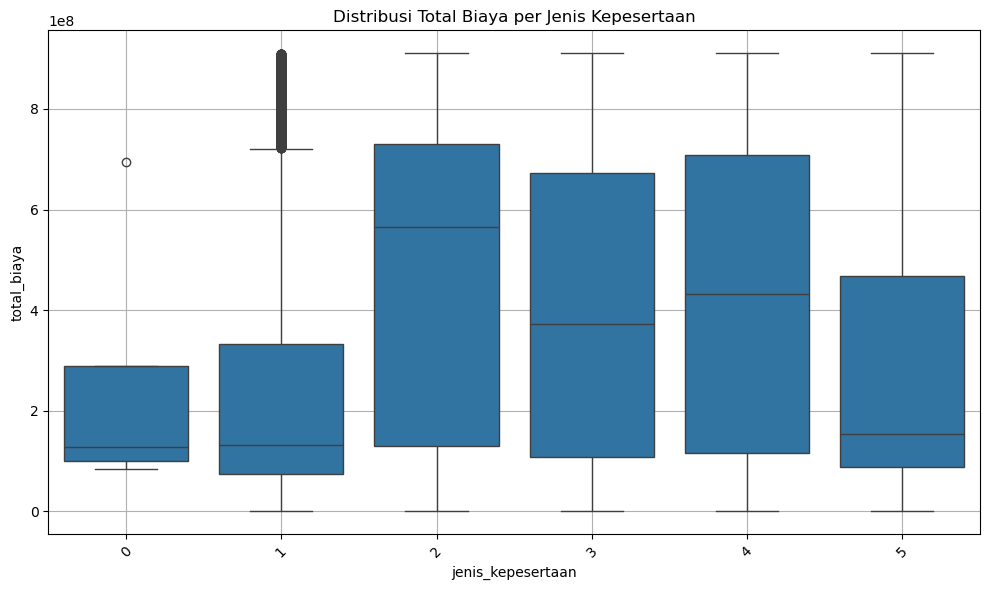

In [43]:
# Visualisasi: Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='jenis_kepesertaan', y='total_biaya')
plt.title('Distribusi Total Biaya per Jenis Kepesertaan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()